In [1]:
import pandas as pd

In [3]:
sent = pd.read_pickle('daily_sentiment.pickle')
index_ = pd.read_csv('주가지수크롤링.csv')

In [4]:
# 날짜 포맷 변경
index_['날짜'] = pd.to_datetime(index_['날짜'], format='%Y%m%d')
index_['날짜'] = index_['날짜'].dt.strftime('%Y-%m-%d')

In [5]:
#종목명 -> 산업 통일 (KRX 제거)
index_['종목명'] = index_['종목명'].str.replace('KRX ', '', regex=False).str.strip()
# 종목명 컬럼 이름 산업으로 변경
index_ = index_.rename(columns={'종목명': 'industry'})
index_

,Unnamed: 0,날짜,industry,종가(백만원),거래량(천주),전일대비
0,0,2025-09-30,건설,768.06,5785558,0.00
1,1,2025-09-30,자동차,1943.49,9983405,0.00
2,2,2025-09-30,헬스케어,4300.21,21906771,0.00
3,3,2025-10-01,건설,773.53,6922801,5.47
4,4,2025-10-01,자동차,1939.15,4695037,-4.34
...,...,...,...,...,...,...
169,169,2025-12-24,자동차,2502.26,8634285,5.89
170,170,2025-12-24,헬스케어,4737.30,22673851,-38.23
171,171,2025-12-26,건설,821.56,33118642,-11.83
172,172,2025-12-26,자동차,2469.70,8059058,-32.56


In [6]:
sent

,날짜,Ave_sentiment,본문,industry
0,2025-10-01,0.840384,158,헬스케어
1,2025-10-02,0.842149,108,헬스케어
2,2025-10-03,0.487421,22,헬스케어
3,2025-10-04,0.436878,12,헬스케어
4,2025-10-05,0.424447,10,헬스케어
...,...,...,...,...
77,2025-12-17,0.684655,92,건설
78,2025-12-18,0.600379,157,건설
79,2025-12-19,0.784986,87,건설
80,2025-12-20,0.574031,17,건설


In [7]:
# 종가
pivot_index_price = index_.pivot(index='날짜', columns='industry', values='종가(백만원)')
pivot_index_price

industry,건설,자동차,헬스케어
날짜,,,
2025-09-30,768.06,1943.49,4300.21
2025-10-01,773.53,1939.15,4310.45
2025-10-02,774.52,1969.88,4337.19
2025-10-10,788.26,1947.34,4306.05
2025-10-13,786.46,1937.16,4249.36
2025-10-14,788.96,1969.98,4216.84
2025-10-15,822.37,1990.01,4269.97
2025-10-16,813.93,2088.13,4261.16
2025-10-17,788.76,2106.55,4230.75


In [8]:
# 거래량
pivot_index_volumn = index_.pivot(index='날짜', columns='industry', values='거래량(천주)')
pivot_index_volumn

industry,건설,자동차,헬스케어
날짜,,,
2025-09-30,5785558,9983405,21906771
2025-10-01,6922801,4695037,19133635
2025-10-02,7349337,8220561,19613616
2025-10-10,11288559,15487431,20284295
2025-10-13,8443590,8574522,17599403
2025-10-14,36232856,10172371,21466143
2025-10-15,45891024,7339034,16407745
2025-10-16,14235330,18697804,22341935
2025-10-17,12199596,16579593,32031933


In [9]:
# 1. 인덱스로 되어 있는 '날짜'를 컬럼으로 빼내기
pivot_index_price = pivot_index_price.reset_index()
pivot_index_volumn = pivot_index_volumn.reset_index()

# 2. 이제 '날짜' 컬럼을 id_vars로 지정해서 melt 실행
melted_price = pivot_index_price.melt(id_vars='날짜', var_name='industry', value_name='종가')
melted_volumn = pivot_index_volumn.melt(id_vars='날짜', var_name='industry', value_name='거래량')

# 3. 병합 (먼저 시장 데이터끼리 합치기)
df_market = pd.merge(melted_price, melted_volumn, on=['날짜', 'industry'])

In [10]:
# 4. 첫 번째 데이터(감성분석 데이터)와 최종 병합
# (이때 df1의 '날짜'와 df_market의 '날짜' 데이터 타입이 같아야 합니다)
final_df = pd.merge(sent, df_market, on=['날짜', 'industry'], how='inner')
final_df

,날짜,Ave_sentiment,본문,industry,종가,거래량
0,2025-10-01,0.840384,158,헬스케어,4310.45,19133635
1,2025-10-02,0.842149,108,헬스케어,4337.19,19613616
2,2025-10-10,0.836033,82,헬스케어,4306.05,20284295
3,2025-10-13,0.858203,167,헬스케어,4249.36,17599403
4,2025-10-14,0.793306,142,헬스케어,4216.84,21466143
...,...,...,...,...,...,...
154,2025-12-15,0.801713,99,건설,839.68,105706338
155,2025-12-16,0.711394,133,건설,816.94,86006726
156,2025-12-17,0.684655,92,건설,830.52,55711227
157,2025-12-18,0.600379,157,건설,819.46,61044416


In [11]:
# 1. 날짜별 그룹화. 해당 날짜의 전체 본문 개수(Total)를 구하고 비중 계산
final_df['날짜별_총본문'] = final_df.groupby('날짜')['본문'].transform('sum')
final_df['본문비중'] = final_df['본문'] / final_df['날짜별_총본문']

# 2. '날짜'와 'industry' 순으로 정렬
final_df = final_df.sort_values(['날짜', 'industry']).reset_index(drop=True)

# 결과 확인 (주요 컬럼만 출력)
final_df

# 컬럼 순서 변경

final_df = final_df.drop(['본문', '날짜별_총본문'],axis=1)

In [12]:
final_df

,날짜,Ave_sentiment,industry,종가,거래량,본문비중
0,2025-10-01,0.696901,건설,773.53,6922801,0.192220
1,2025-10-01,0.771693,자동차,1939.15,4695037,0.446224
2,2025-10-01,0.840384,헬스케어,4310.45,19133635,0.361556
3,2025-10-02,0.669425,건설,774.52,7349337,0.142857
4,2025-10-02,0.816091,자동차,1969.88,8220561,0.471429
...,...,...,...,...,...,...
154,2025-12-18,0.697370,자동차,2459.08,9597483,0.364922
155,2025-12-18,0.856880,헬스케어,4775.98,21146956,0.413013
156,2025-12-19,0.784986,건설,820.60,36010498,0.213235
157,2025-12-19,0.833648,자동차,2515.84,12805626,0.316176


In [13]:
final_df = final_df[['날짜','industry','Ave_sentiment','본문비중','종가','거래량']]
final_df

,날짜,industry,Ave_sentiment,본문비중,종가,거래량
0,2025-10-01,건설,0.696901,0.192220,773.53,6922801
1,2025-10-01,자동차,0.771693,0.446224,1939.15,4695037
2,2025-10-01,헬스케어,0.840384,0.361556,4310.45,19133635
3,2025-10-02,건설,0.669425,0.142857,774.52,7349337
4,2025-10-02,자동차,0.816091,0.471429,1969.88,8220561
...,...,...,...,...,...,...
154,2025-12-18,자동차,0.697370,0.364922,2459.08,9597483
155,2025-12-18,헬스케어,0.856880,0.413013,4775.98,21146956
156,2025-12-19,건설,0.784986,0.213235,820.60,36010498
157,2025-12-19,자동차,0.833648,0.316176,2515.84,12805626


In [14]:
# 업종별, 날짜별 정렬
final_df = final_df.sort_values(['industry', '날짜'])
# 내일 종가(y1)와 다다음날 종가(y2) 컬럼 생성
final_df['D+1 종가'] = final_df.groupby('industry')['종가'].shift(-1)
final_df['D+2 종가'] = final_df.groupby('industry')['종가'].shift(-2)
final_df

# 마지막 이틀 (결측치) 제거
train_df = final_df.dropna()
train_df

,날짜,industry,Ave_sentiment,본문비중,종가,거래량,D+1 종가,D+2 종가
0,2025-10-01,건설,0.696901,0.192220,773.53,6922801,774.52,788.26
3,2025-10-02,건설,0.669425,0.142857,774.52,7349337,788.26,786.46
6,2025-10-10,건설,0.580599,0.167598,788.26,11288559,786.46,788.96
9,2025-10-13,건설,0.573305,0.154799,786.46,8443590,788.96,822.37
12,2025-10-14,건설,0.525187,0.216463,788.96,36232856,822.37,813.93
...,...,...,...,...,...,...,...,...
140,2025-12-11,헬스케어,0.868432,0.341198,4913.26,59600055,4865.25,4927.73
143,2025-12-12,헬스케어,0.798749,0.345455,4865.25,45320878,4927.73,4881.50
146,2025-12-15,헬스케어,0.803046,0.431866,4927.73,30104286,4881.50,4796.50
149,2025-12-16,헬스케어,0.798630,0.408346,4881.50,38287102,4796.50,4775.98


In [15]:
# 분류분석
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 타겟 생성 (내일 종가가 오늘보다 크면 1, 아니면 0)
train_df['target_direction'] = (train_df['D+1 종가'] > train_df['종가']).astype(int)

X = train_df[['Ave_sentiment', '본문비중', '거래량']] # 가격 의존도를 낮추기 위해 종가는 제외
y_cls = train_df['target_direction']

# 2. 데이터 분할
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# 3. 모델 학습 (분류기)
model_cls = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model_cls.fit(X_train_c, y_train_c)

# 4. 평가
y_pred_c = model_cls.predict(X_test_c)
print("=== [분류] 내일 상승/하락 예측 결과 ===")
print(f"정확도(Accuracy): {accuracy_score(y_test_c, y_pred_c):.4f}")
print(classification_report(y_test_c, y_pred_c))

C:\Users\kimjh\AppData\Local\Temp\ipykernel_27868\1371554207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['target_direction'] = (train_df['D+1 종가'] > train_df['종가']).astype(int)


NameError: name 'train_test_split' is not defined

In [16]:
# 회귀분석
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. 타겟 생성 (내일 수익률)
train_df['target_return'] = (train_df['D+1 종가'] - train_df['종가']) / train_df['종가']

X = train_df[['Ave_sentiment', '본문비중', '거래량']]
y_reg = train_df['target_return']

# 2. 데이터 분할
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# 3. 모델 학습 (회귀기)
model_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model_reg.fit(X_train_r, y_train_r)

# 4. 평가
y_pred_r = model_reg.predict(X_test_r)
print("\n=== [회귀] 내일 수익률 예측 결과 ===")
print(f"결정계수(R2): {r2_score(y_test_r, y_pred_r):.4f}")
print(f"평균 절대 오차(MAE): {mean_absolute_error(y_test_r, y_pred_r):.4f}")

C:\Users\kimjh\AppData\Local\Temp\ipykernel_27868\812058616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['target_return'] = (train_df['D+1 종가'] - train_df['종가']) / train_df['종가']


NameError: name 'train_test_split' is not defined

In [17]:
train_df

,날짜,industry,Ave_sentiment,본문비중,종가,거래량,D+1 종가,D+2 종가,target_direction,target_return
0,2025-10-01,건설,0.696901,0.192220,773.53,6922801,774.52,788.26,1,0.001280
3,2025-10-02,건설,0.669425,0.142857,774.52,7349337,788.26,786.46,1,0.017740
6,2025-10-10,건설,0.580599,0.167598,788.26,11288559,786.46,788.96,0,-0.002284
9,2025-10-13,건설,0.573305,0.154799,786.46,8443590,788.96,822.37,1,0.003179
12,2025-10-14,건설,0.525187,0.216463,788.96,36232856,822.37,813.93,1,0.042347
...,...,...,...,...,...,...,...,...,...,...
140,2025-12-11,헬스케어,0.868432,0.341198,4913.26,59600055,4865.25,4927.73,0,-0.009772
143,2025-12-12,헬스케어,0.798749,0.345455,4865.25,45320878,4927.73,4881.50,1,0.012842
146,2025-12-15,헬스케어,0.803046,0.431866,4927.73,30104286,4881.50,4796.50,0,-0.009382
149,2025-12-16,헬스케어,0.798630,0.408346,4881.50,38287102,4796.50,4775.98,0,-0.017413


In [18]:
# LSTM 데이터 스케일링
from sklearn.preprocessing import StandardScaler

# 1. 입력 데이터(X) 스케일링
scaler_x = StandardScaler()
features = ['Ave_sentiment', '본문비중', '거래량', '종가']
X_scaled = scaler_x.fit_transform(train_df[features])

# 2. 출력 데이터(y) 스케일링
scaler_y = StandardScaler()
y_targets = train_df[['D+1 종가', 'D+2 종가']].values
y_scaled = scaler_y.fit_transform(y_targets)

# LSTM 입력을 위한 reshape (샘플, 타임스텝, 특성)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [19]:
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(128, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2) # 내일, 모레 수익률 2개
])

# 학습률을 낮춰서(0.001) 학습
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 학습
history = model.fit(X_reshaped, y_scaled, epochs=200, batch_size=8, validation_split=0.2, verbose=1)

NameError: name 'Sequential' is not defined

In [35]:
def predict_deep_corrected(industry_name):
    latest = final_df[final_df['industry'] == industry_name][features].iloc[-1:]
    latest_scaled = scaler_x.transform(latest)
    latest_reshaped = latest_scaled.reshape((1, 1, latest_scaled.shape[1]))
    
    # 예측 및 역변환
    pred_scaled = model.predict(latest_reshaped)
    pred_final = scaler_y.inverse_transform(pred_scaled) # 원래 수익률로 복구
    
    pred_1d = pred_final[0][0]
    pred_2d = pred_final[0][1]
    
    print(f"[{industry_name}] 딥러닝 예측 결과")
    print(f"● 내일(D+1): {pred_1d*100:+.2f}%")
    print(f"● 모레(D+2): {pred_2d*100:+.2f}%")
    print("-" * 30)

for ind in final_df['industry'].unique():
    predict_deep_corrected(ind)

1/1 [==============================] - 0s 13ms/step
[건설] 딥러닝 예측 결과
● 내일(D+1): +92478.74%
● 모레(D+2): +92625.95%
------------------------------
1/1 [==============================] - 0s 12ms/step
[자동차] 딥러닝 예측 결과
● 내일(D+1): +232461.72%
● 모레(D+2): +228379.54%
------------------------------
1/1 [==============================] - 0s 12ms/step
[헬스케어] 딥러닝 예측 결과
● 내일(D+1): +493876.03%
● 모레(D+2): +493321.78%
------------------------------


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. 데이터 준비
# 산업별 정렬
df = final_df.sort_values(['industry', '날짜']).copy()

# 내일(D+1) 수익률과 모레(D+2) 수익률
df['return_1d'] = (df.groupby('industry')['종가'].shift(-1) - df['종가']) / df['종가']
df['return_2d'] = (df.groupby('industry')['종가'].shift(-2) - df['종가']) / df['종가']

# 분석에 사용할 특성(X)과 타겟(y) 
features = ['Ave_sentiment', '본문비중', '거래량', '종가']
targets = ['return_1d', 'return_2d']

# 결측치제거 (마지막 2 days)
train_df = df.dropna(subset=targets)

# 2. 데이터 스케일링
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(train_df[features])

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(train_df[targets])

# LSTM 입력을 위한 3차원 변환
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 3. 딥러닝 모델 설계
model = Sequential([
    LSTM(128, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2) # 내일 수익률, 모레 수익률 2개 출력
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 4. 모델 학습
print("학습 시작")
history = model.fit(X_reshaped, y_scaled, epochs=200, batch_size=8, validation_split=0.2, verbose=0)
print("학습 완료")

# 5. 결과 예측 및 복원 함수
def get_final_prediction():
    print("\n" + "="*50)
    print("       [딥러닝 기반 내일/모레 주가 예측 결과]")
    print("="*50)
    
    for industry in df['industry'].unique():
        # 가장 최신 데이터 1건 추출
        latest_data = df[df['industry'] == industry].iloc[-1:]
        
        # 입력 데이터 전처리
        X_input = scaler_x.transform(latest_data[features])
        X_input_reshaped = X_input.reshape((1, 1, X_input.shape[1]))
        
        # 예측 (표준화된 값으로 나옴)
        pred_scaled = model.predict(X_input_reshaped, verbose=0)
        
        # ★ 역변환을 통해 실제 수익률(소수점)로 복원 ★
        pred_final = scaler_y.inverse_transform(pred_scaled)
        
        p_1d = pred_final[0][0]
        p_2d = pred_final[0][1]
        
        # 결과 출력
        print(f"[{industry}]")
        print(f" ▶ 내일(D+1): {p_1d*100:+.2f}%  ({'상승' if p_1d > 0 else '하락'})")
        print(f" ▶ 모레(D+2): {p_2d*100:+.2f}%  ({'상승' if p_2d > 0 else '하락'})")
        print("-" * 50)

# 최종 결과 호출
get_final_prediction()

학습을 시작합니다...
학습 완료!

       [딥러닝 기반 내일/모레 주가 예측 결과]
[건설]
 ▶ 내일(D+1): -0.85%  (하락)
 ▶ 모레(D+2): -0.51%  (하락)
--------------------------------------------------
[자동차]
 ▶ 내일(D+1): -0.62%  (하락)
 ▶ 모레(D+2): -1.09%  (하락)
--------------------------------------------------
[헬스케어]
 ▶ 내일(D+1): -1.08%  (하락)
 ▶ 모레(D+2): -1.58%  (하락)
--------------------------------------------------


1/1 [==============================] - 0s 14ms/step


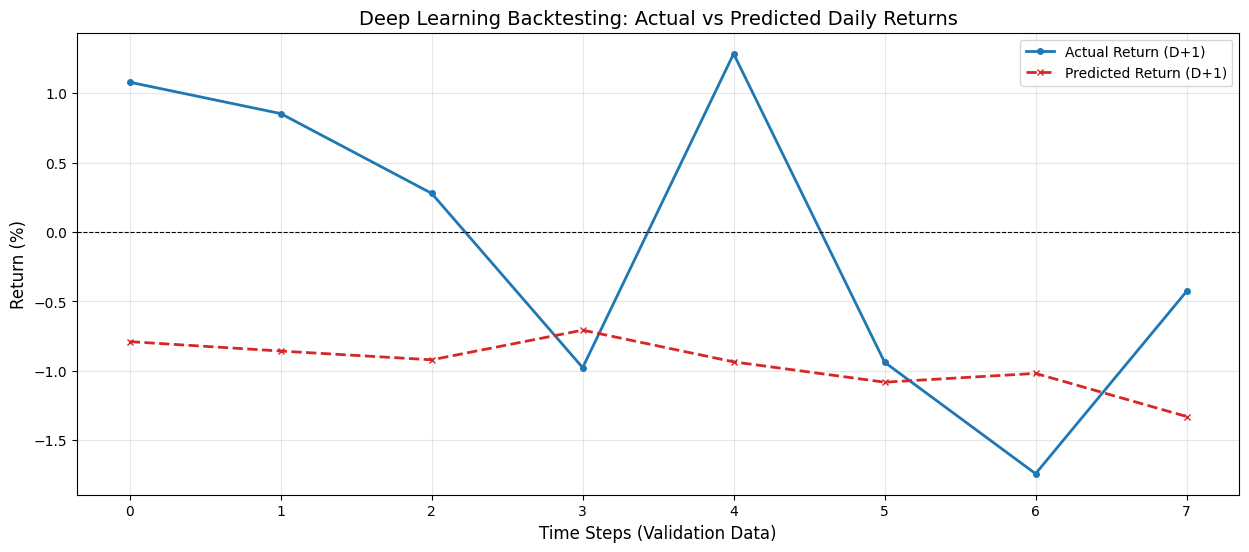

평균 절대 오차(MAE): 1.1295%


In [38]:
# 1. 검증용 데이터 (학습 시 사용했던 validation_split 비율에 맞춰 추출)
split_idx = int(len(X_reshaped) * 0.8)
X_val = X_reshaped[split_idx:]
y_val_scaled = y_scaled[split_idx:]

# 2. 모델을 통한 예측
y_val_pred_scaled = model.predict(X_val)

# 3. 스케일링 된 값을 다시 실제 수익률(%)로 역변환
y_val_actual = scaler_y.inverse_transform(y_val_scaled)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)

# 4. 내일(D+1) 수익률 기준으로 실제 vs 예측 비교 시각화
plt.figure(figsize=(15, 6))

# 실제값 (파란색 실선)
plt.plot(y_val_actual[:, 0] * 100, label='Actual Return (D+1)', color='#1f77b4', linewidth=2, marker='o', markersize=4)
# 예측값 (빨간색 점선)
plt.plot(y_val_pred[:, 0] * 100, label='Predicted Return (D+1)', color='#d62728', linestyle='--', linewidth=2, marker='x', markersize=4)

plt.axhline(0, color='black', linewidth=0.8, linestyle='--') # 0% 기준선
plt.title('Deep Learning Backtesting: Actual vs Predicted Daily Returns', fontsize=14)
plt.xlabel('Time Steps (Validation Data)', fontsize=12)
plt.ylabel('Return (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. 간단한 수치 평가
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val_actual[:, 0], y_val_pred[:, 0])
print(f"평균 절대 오차(MAE): {mae*100:.4f}%")